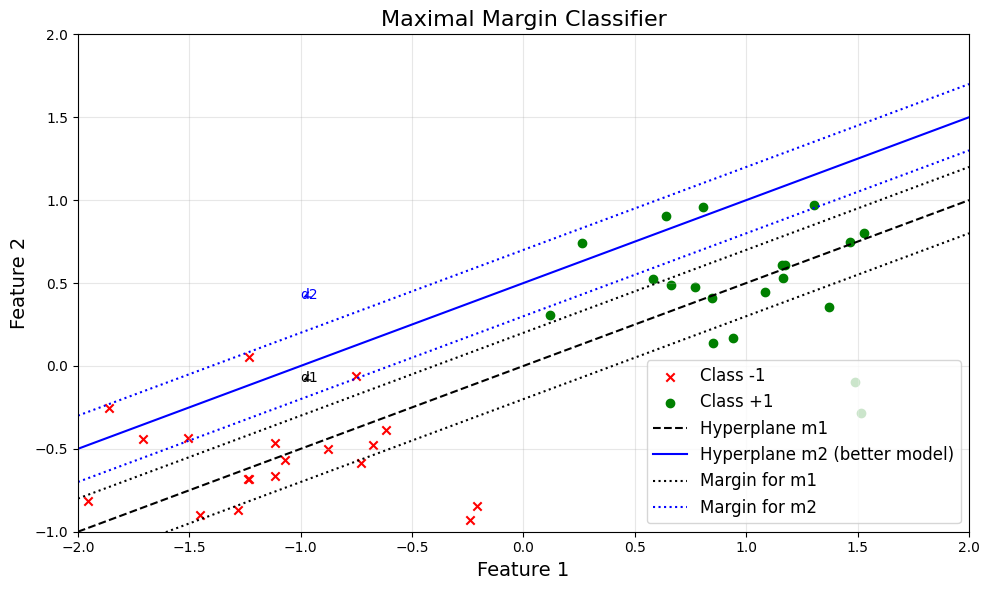

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Correcting the plot to include data points and properly display margins and hyperplanes

# Generate data points for two classes
np.random.seed(42)
class1_x = np.random.normal(loc=-1, scale=0.5, size=20)
class1_y = np.random.normal(loc=-0.5, scale=0.3, size=20)
class2_x = np.random.normal(loc=1, scale=0.5, size=20)
class2_y = np.random.normal(loc=0.5, scale=0.3, size=20)

# Generate the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot data points
ax.scatter(class1_x, class1_y, color="red", label="Class -1", marker="x")
ax.scatter(class2_x, class2_y, color="green", label="Class +1", marker="o")

# Define hyperplanes and margins
x = np.linspace(-2, 2, 100)
m1 = 0.5 * x  # m1 hyperplane (smaller margin)
m2 = 0.5 * x + 0.5  # m2 hyperplane (better margin)
m1_margin_upper = 0.5 * x + 0.2  # Upper margin for m1
m1_margin_lower = 0.5 * x - 0.2  # Lower margin for m1
m2_margin_upper = 0.5 * x + 0.7  # Upper margin for m2
m2_margin_lower = 0.5 * x + 0.3  # Lower margin for m2

# Plot hyperplanes and margins
ax.plot(x, m1, "k--", label="Hyperplane m1")
ax.plot(x, m2, "b-", label="Hyperplane m2 (better model)")
ax.plot(x, m1_margin_upper, "k:", label="Margin for m1")
ax.plot(x, m1_margin_lower, "k:")
ax.plot(x, m2_margin_upper, "b:", label="Margin for m2")
ax.plot(x, m2_margin_lower, "b:")

# Highlight distances (d1 and d2)
ax.annotate("d1", xy=(-1.0, m1_margin_upper[30] + 0.1), fontsize=10, color="black",
            arrowprops=dict(arrowstyle="->", color="black"))
ax.annotate("d2", xy=(-1.0, m2_margin_upper[30] + 0.1), fontsize=10, color="blue",
            arrowprops=dict(arrowstyle="->", color="blue"))

# Add axis labels and title
ax.set_xlabel("Feature 1", fontsize=14)
ax.set_ylabel("Feature 2", fontsize=14)
ax.set_title("Maximal Margin Classifier", fontsize=16)

# Add legend
ax.legend(fontsize=12, loc="lower right")

# Set limits and grid
ax.set_xlim(-2, 2)
ax.set_ylim(-1, 2)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


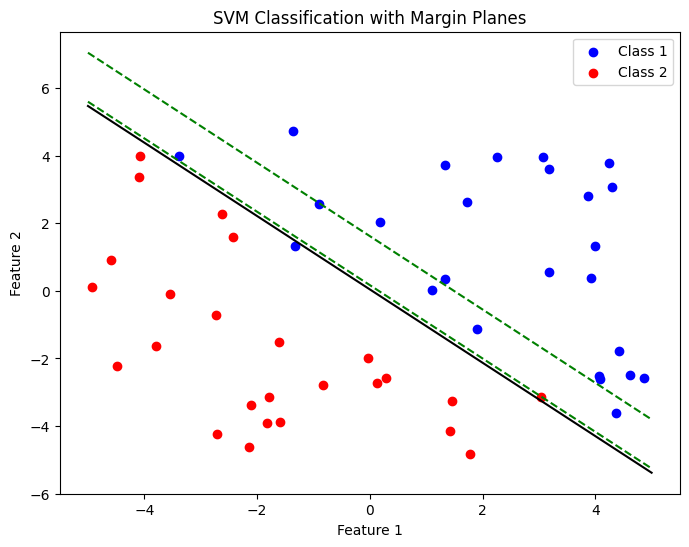

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate random data
X = np.random.rand(50, 2) * 10 - 5
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

# Train SVM classifier
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Plot the data and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='r', label='Class 2')

# Plot the decision boundary
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')

# Plot the margin planes
b = clf.support_vectors_[0]
yy_down = a * xx - (a * b[0] - b[1]) / w[1]
yy_up = a * xx - (a * b[0] - b[1]) / w[1] + 2 / np.linalg.norm(w)
plt.plot(xx, yy_down, 'g--')
plt.plot(xx, yy_up, 'g--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification with Margin Planes')
plt.legend()
plt.show()